# Lab4: KNN

### Дабеска Мила 193263

&nbsp;

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv('history-of-rock-spotify.csv')
dataset.drop(['index', 'danceability.1'], axis=1, inplace = True)
dataset.set_index('name', inplace=True)
dataset

,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
name,,,,,,,,,,,,,,,
Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.559833,47,0.296,0.005910,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406
Cellophane,King Gizzard & The Lizard Wizard,2014,3.179750,44,0.432,0.002130,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357
Hot Water,King Gizzard & The Lizard Wizard,2014,3.396450,40,0.627,0.860000,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734


In [3]:
dataset_encoded = dataset.apply(LabelEncoder().fit_transform)
dataset_encoded.head()

NameError: name 'X' is not defined

In [4]:
X = dataset_encoded.drop(['key'], axis=1)
y = ['key']

features = dataset_encoded.columns.drop(['key'])
labels = ['key']

NameError: name 'dataset_encoded' is not defined

In [5]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataset_encoded[features], dataset[labels], test_size=0.2)

In [7]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### KNN Classification

In [8]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[29 13 21  1 19  8  3 12  1 16  3  7]
 [21  9 18  2  8  1  5 13  1  7  0  2]
 [36 16 27  3 15  7  4 17  0 23  4  7]
 [11  2  4  0  1  1  0  3  0  2  0  2]
 [28 12 26  2  7  5  4 13  2  9  1  3]
 [25  7 10  1  4  0  3  8  2 10  1  2]
 [11  8 12  0  6  5  4  7  0  5  1  5]
 [29 17 22  3 19 11  6 14  2 15  1  1]
 [10  8 12  0  3  0  1  6  1  5  2  0]
 [32 12 26  2 14  4  4 21  1 10  0  5]
 [14  1 11  1  6  3  3  9  0  5  1  1]
 [19  6 12  0  3  2  3 11  1 10  0  2]]
              precision    recall  f1-score   support

           0       0.11      0.22      0.15       133
           1       0.08      0.10      0.09        87
           2       0.13      0.17      0.15       159
           3       0.00      0.00      0.00        26
           4       0.07      0.06      0.06       112
           5       0.00      0.00      0.00        73
           6       0.10      0.06      0.08        64
           7       0.10      0.10      0.10       140
           8       0.09      0.02      0.03 

In [11]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test.values))

Text(0, 0.5, 'Mean Error')

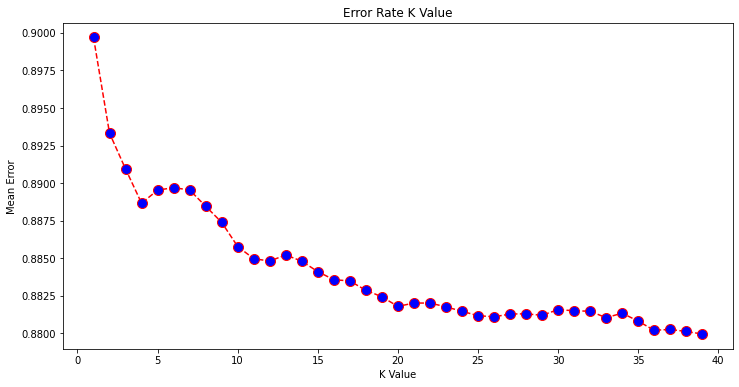

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [13]:
error2 = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric="cosine")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error2.append(np.mean(pred_i != y_test.values))

In [14]:
error3 = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error3.append(np.mean(pred_i != y_test.values))

In [15]:
error4 = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric="manhattan")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error4.append(np.mean(pred_i != y_test.values))

In [16]:
error5 = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric="minkowski")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error5.append(np.mean(pred_i != y_test.values))

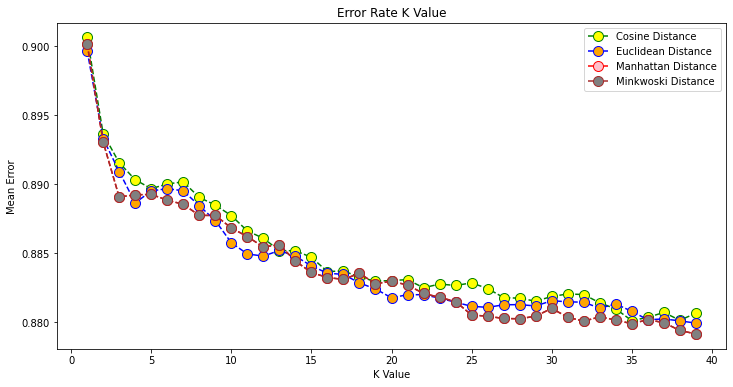

In [17]:
plt.figure(figsize=(12, 6))
# plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
#          markerfacecolor='blue', markersize=10)
plt.plot(range(1, 40), error2, color='green', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10, label='Cosine Distance')
plt.plot(range(1, 40), error3, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=10, label='Euclidean Distance')
plt.plot(range(1, 40), error4, color='red', linestyle='dashed', marker='o',
         markerfacecolor='pink', markersize=10, label='Manhattan Distance')
plt.plot(range(1, 40), error4, color='brown', linestyle='dashed', marker='o',
         markerfacecolor='gray', markersize=10, label='Minkwoski Distance')

plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.legend()
plt.show()

### KNN Regression

In [18]:
error = []
rmse = []

for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(abs(pred_i - y_test)))
    rmse.append(sqrt(mean_squared_error(pred_i, y_test)))

Text(0, 0.5, 'Mean Error')

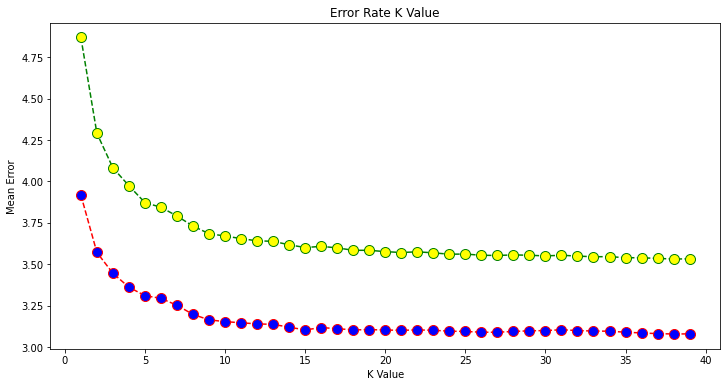

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 40), rmse, color='green', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')